importing libraries

In [58]:
import pandas as pd
import numpy as np

#1. Data Ingestion and Preprocessing

In [59]:
df =pd.read_csv('/content/new_dataset.csv', on_bad_lines='skip')
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [60]:
# Count occurrences of each sentiment class
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)


Sentiment
positive    166581
negative     28232
neutral      10239
Name: count, dtype: int64


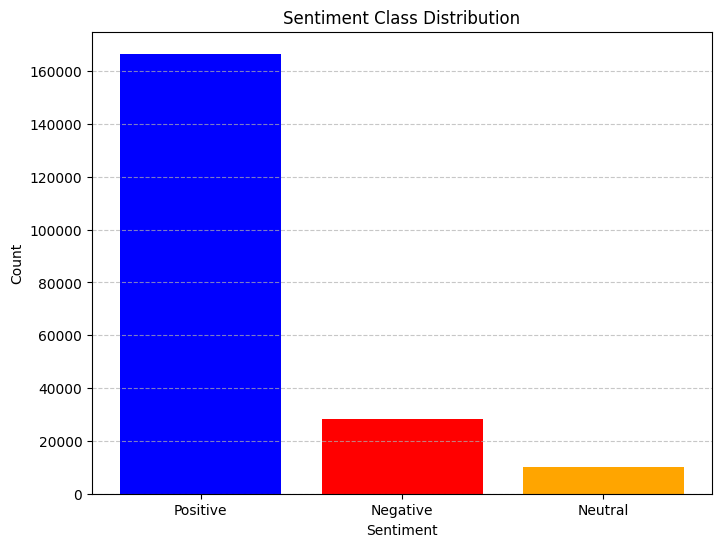

In [61]:
import matplotlib.pyplot as plt

# Count occurrences of each sentiment class
sentiment_counts = df['Sentiment'].value_counts()

# Define labels for the classes
labels = ['Positive', 'Negative', 'Neutral']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, sentiment_counts, color=['blue', 'red', 'orange'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [63]:
import pandas as pd

# Assuming your dataset is in a DataFrame called `df`
# Example: `df` has a column 'Sentiment'

# Step 1: Filter the "positive" and "negative" rows
positive_rows = df[df['Sentiment'] == 'positive']

# Step 2: Randomly sample 155,000 rows from the "positive" rows and 10,000 from "negative"
rows_to_drop = positive_rows.sample(n=110000, random_state=42)


# Step 3: Drop the sampled rows from the original DataFrame
df = df.drop(rows_to_drop.index)

# Step 4: Check the counts after dropping rows
print(df['Sentiment'].value_counts())


Sentiment
positive    56581
negative    28232
neutral     10239
Name: count, dtype: int64


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95052 entries, 2 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   95052 non-null  object
 1   product_price  95052 non-null  object
 2   Rate           95052 non-null  object
 3   Review         83255 non-null  object
 4   Summary        95044 non-null  object
 5   Sentiment      95052 non-null  object
dtypes: object(6)
memory usage: 5.1+ MB


In [65]:
print(df.isnull().sum())


product_name         0
product_price        0
Rate                 0
Review           11797
Summary              8
Sentiment            0
dtype: int64


In [66]:
df=df.dropna()

In [67]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
...,...,...,...,...,...,...
205033,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,good choice,nice product,positive
205042,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,nice product,positive
205043,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,material good backing super,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,classy product,beautiful set very nice,positive


In [68]:
print(df.isnull().sum())


product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64


In [69]:

df.drop(['product_name','product_price','Rate','Review'],axis=1,inplace=True)

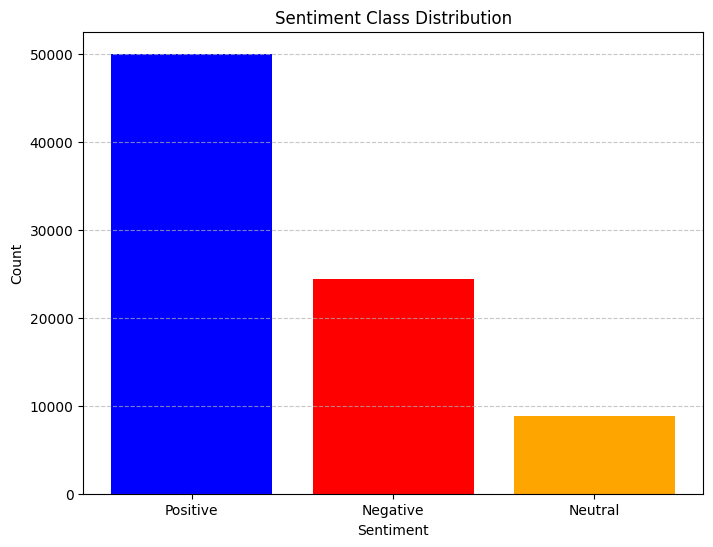

In [70]:
import matplotlib.pyplot as plt

# Count occurrences of each sentiment class
sentiment_counts = df['Sentiment'].value_counts()

# Define labels for the classes
labels = ['Positive', 'Negative', 'Neutral']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, sentiment_counts, color=['blue', 'red', 'orange'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [71]:
df

,Summary,Sentiment
2,the quality is good but the power of air is de...,positive
3,very bad product its a only a fan,negative
4,ok ok product,neutral
7,very nice,positive
8,very bad cooler,negative
...,...,...
205033,nice product,positive
205042,nice product,positive
205043,material good backing super,positive
205046,beautiful set very nice,positive


**mapping
 negative': 0,
 'neutral': 1,
 'positive': 2**

In [72]:
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

In [73]:
df

,Summary,Sentiment
2,the quality is good but the power of air is de...,2
3,very bad product its a only a fan,0
4,ok ok product,1
7,very nice,2
8,very bad cooler,0
...,...,...
205033,nice product,2
205042,nice product,2
205043,material good backing super,2
205046,beautiful set very nice,2


In [74]:
df.rename(columns={'Summary': 'Review Text'}, inplace=True)

In [75]:
df

,Review Text,Sentiment
2,the quality is good but the power of air is de...,2
3,very bad product its a only a fan,0
4,ok ok product,1
7,very nice,2
8,very bad cooler,0
...,...,...
205033,nice product,2
205042,nice product,2
205043,material good backing super,2
205046,beautiful set very nice,2


#2)Model Development

In [76]:
!pip install spacy


In [77]:

import spacy
import pandas as pd
from spacy.tokens import DocBin

# Load the SpaCy English model
nlp = spacy.load("en_core_web_sm")


In [78]:
def preprocess_text(text):
    # Process the text with SpaCy
    doc = nlp(text)

    # Tokenization and Lemmatization
    tokens = [token.lemma_ for token in doc]  # Lemmatize each token

    # Return the preprocessed text (joined tokens)
    return " ".join(tokens)


##preprocessed text after doing tokenization , lemmatization and stopwords removing

In [79]:
# Apply the preprocessing function to the 'Review Text' column
df['Processed_Text'] = df['Review Text'].apply(preprocess_text)

# Display the first few rows of the processed data
print(df[['Review Text', 'Processed_Text']].head())


                                         Review Text  \
2  the quality is good but the power of air is de...   
3                  very bad product its a only a fan   
4                                      ok ok product   
7                                          very nice   
8                                    very bad cooler   

                                      Processed_Text  
2  the quality be good but the power of air be de...  
3                  very bad product its a only a fan  
4                                      ok ok product  
7                                          very nice  
8                                    very bad cooler  


In [80]:
df

,Review Text,Sentiment,Processed_Text
2,the quality is good but the power of air is de...,2,the quality be good but the power of air be de...
3,very bad product its a only a fan,0,very bad product its a only a fan
4,ok ok product,1,ok ok product
7,very nice,2,very nice
8,very bad cooler,0,very bad cooler
...,...,...,...
205033,nice product,2,nice product
205042,nice product,2,nice product
205043,material good backing super,2,material good backing super
205046,beautiful set very nice,2,beautiful set very nice


In [81]:
df['Review Text']=df['Processed_Text']

In [82]:
df

,Review Text,Sentiment,Processed_Text
2,the quality be good but the power of air be de...,2,the quality be good but the power of air be de...
3,very bad product its a only a fan,0,very bad product its a only a fan
4,ok ok product,1,ok ok product
7,very nice,2,very nice
8,very bad cooler,0,very bad cooler
...,...,...,...
205033,nice product,2,nice product
205042,nice product,2,nice product
205043,material good backing super,2,material good backing super
205046,beautiful set very nice,2,beautiful set very nice


In [83]:
df.drop(['Processed_Text'],axis=1,inplace=True)

In [84]:

df

,Review Text,Sentiment
2,the quality be good but the power of air be de...,2
3,very bad product its a only a fan,0
4,ok ok product,1
7,very nice,2
8,very bad cooler,0
...,...,...
205033,nice product,2
205042,nice product,2
205043,material good backing super,2
205046,beautiful set very nice,2


In [85]:
pip install scikit-learn

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
# Assuming your DataFrame is named 'df' and has 'Review Text' and 'Sentiment' columns
X = df['Review Text']  # The review text (features)
y = df['Sentiment']    # The sentiment labels (target)

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Remove stop words
X_vectorized = vectorizer.fit_transform(X)

# Check the shape of the resulting matrix
print(X_vectorized.shape)


(83249, 26574)


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8527
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      7258
           1       0.77      0.46      0.58      2568
           2       0.88      0.94      0.91     15149

    accuracy                           0.85     24975
   macro avg       0.82      0.74      0.76     24975
weighted avg       0.85      0.85      0.85     24975



#3)Model Evaluation

In [95]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8527
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      7258
           1       0.77      0.46      0.58      2568
           2       0.88      0.94      0.91     15149

    accuracy                           0.85     24975
   macro avg       0.82      0.74      0.76     24975
weighted avg       0.85      0.85      0.85     24975



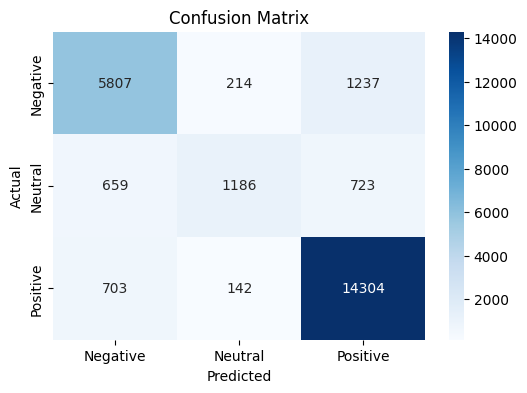

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

# Step 1: Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 2: Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


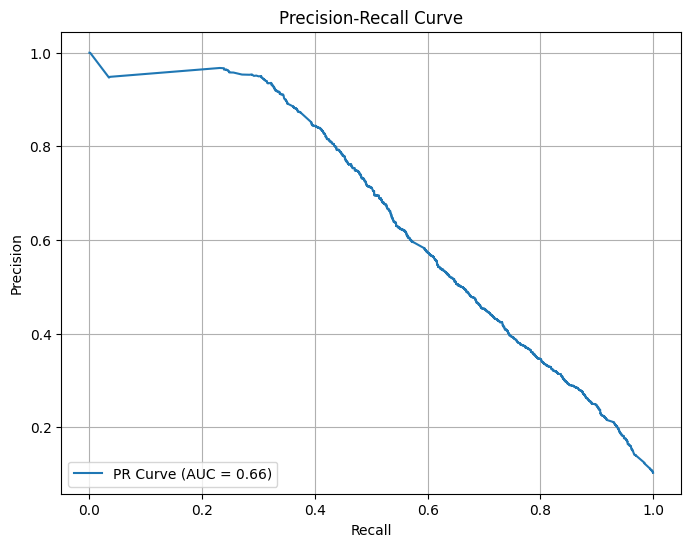

In [97]:
# Step 3: Plot Precision-Recall Curve
y_prob = lr_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
precision, recall, thresholds = precision_recall_curve(y_test, y_prob, pos_label=lr_model.classes_[1])

# Compute AUC for Precision-Recall Curve
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()